<a href="https://colab.research.google.com/github/hoangcuongnguyen2001/Honours_Repository/blob/main/Testing_correlation_between_datasets_and_MITRE_ATT%26CK_reference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from bs4 import BeautifulSoup
import networkx as nx

In [11]:
G = nx.Graph()

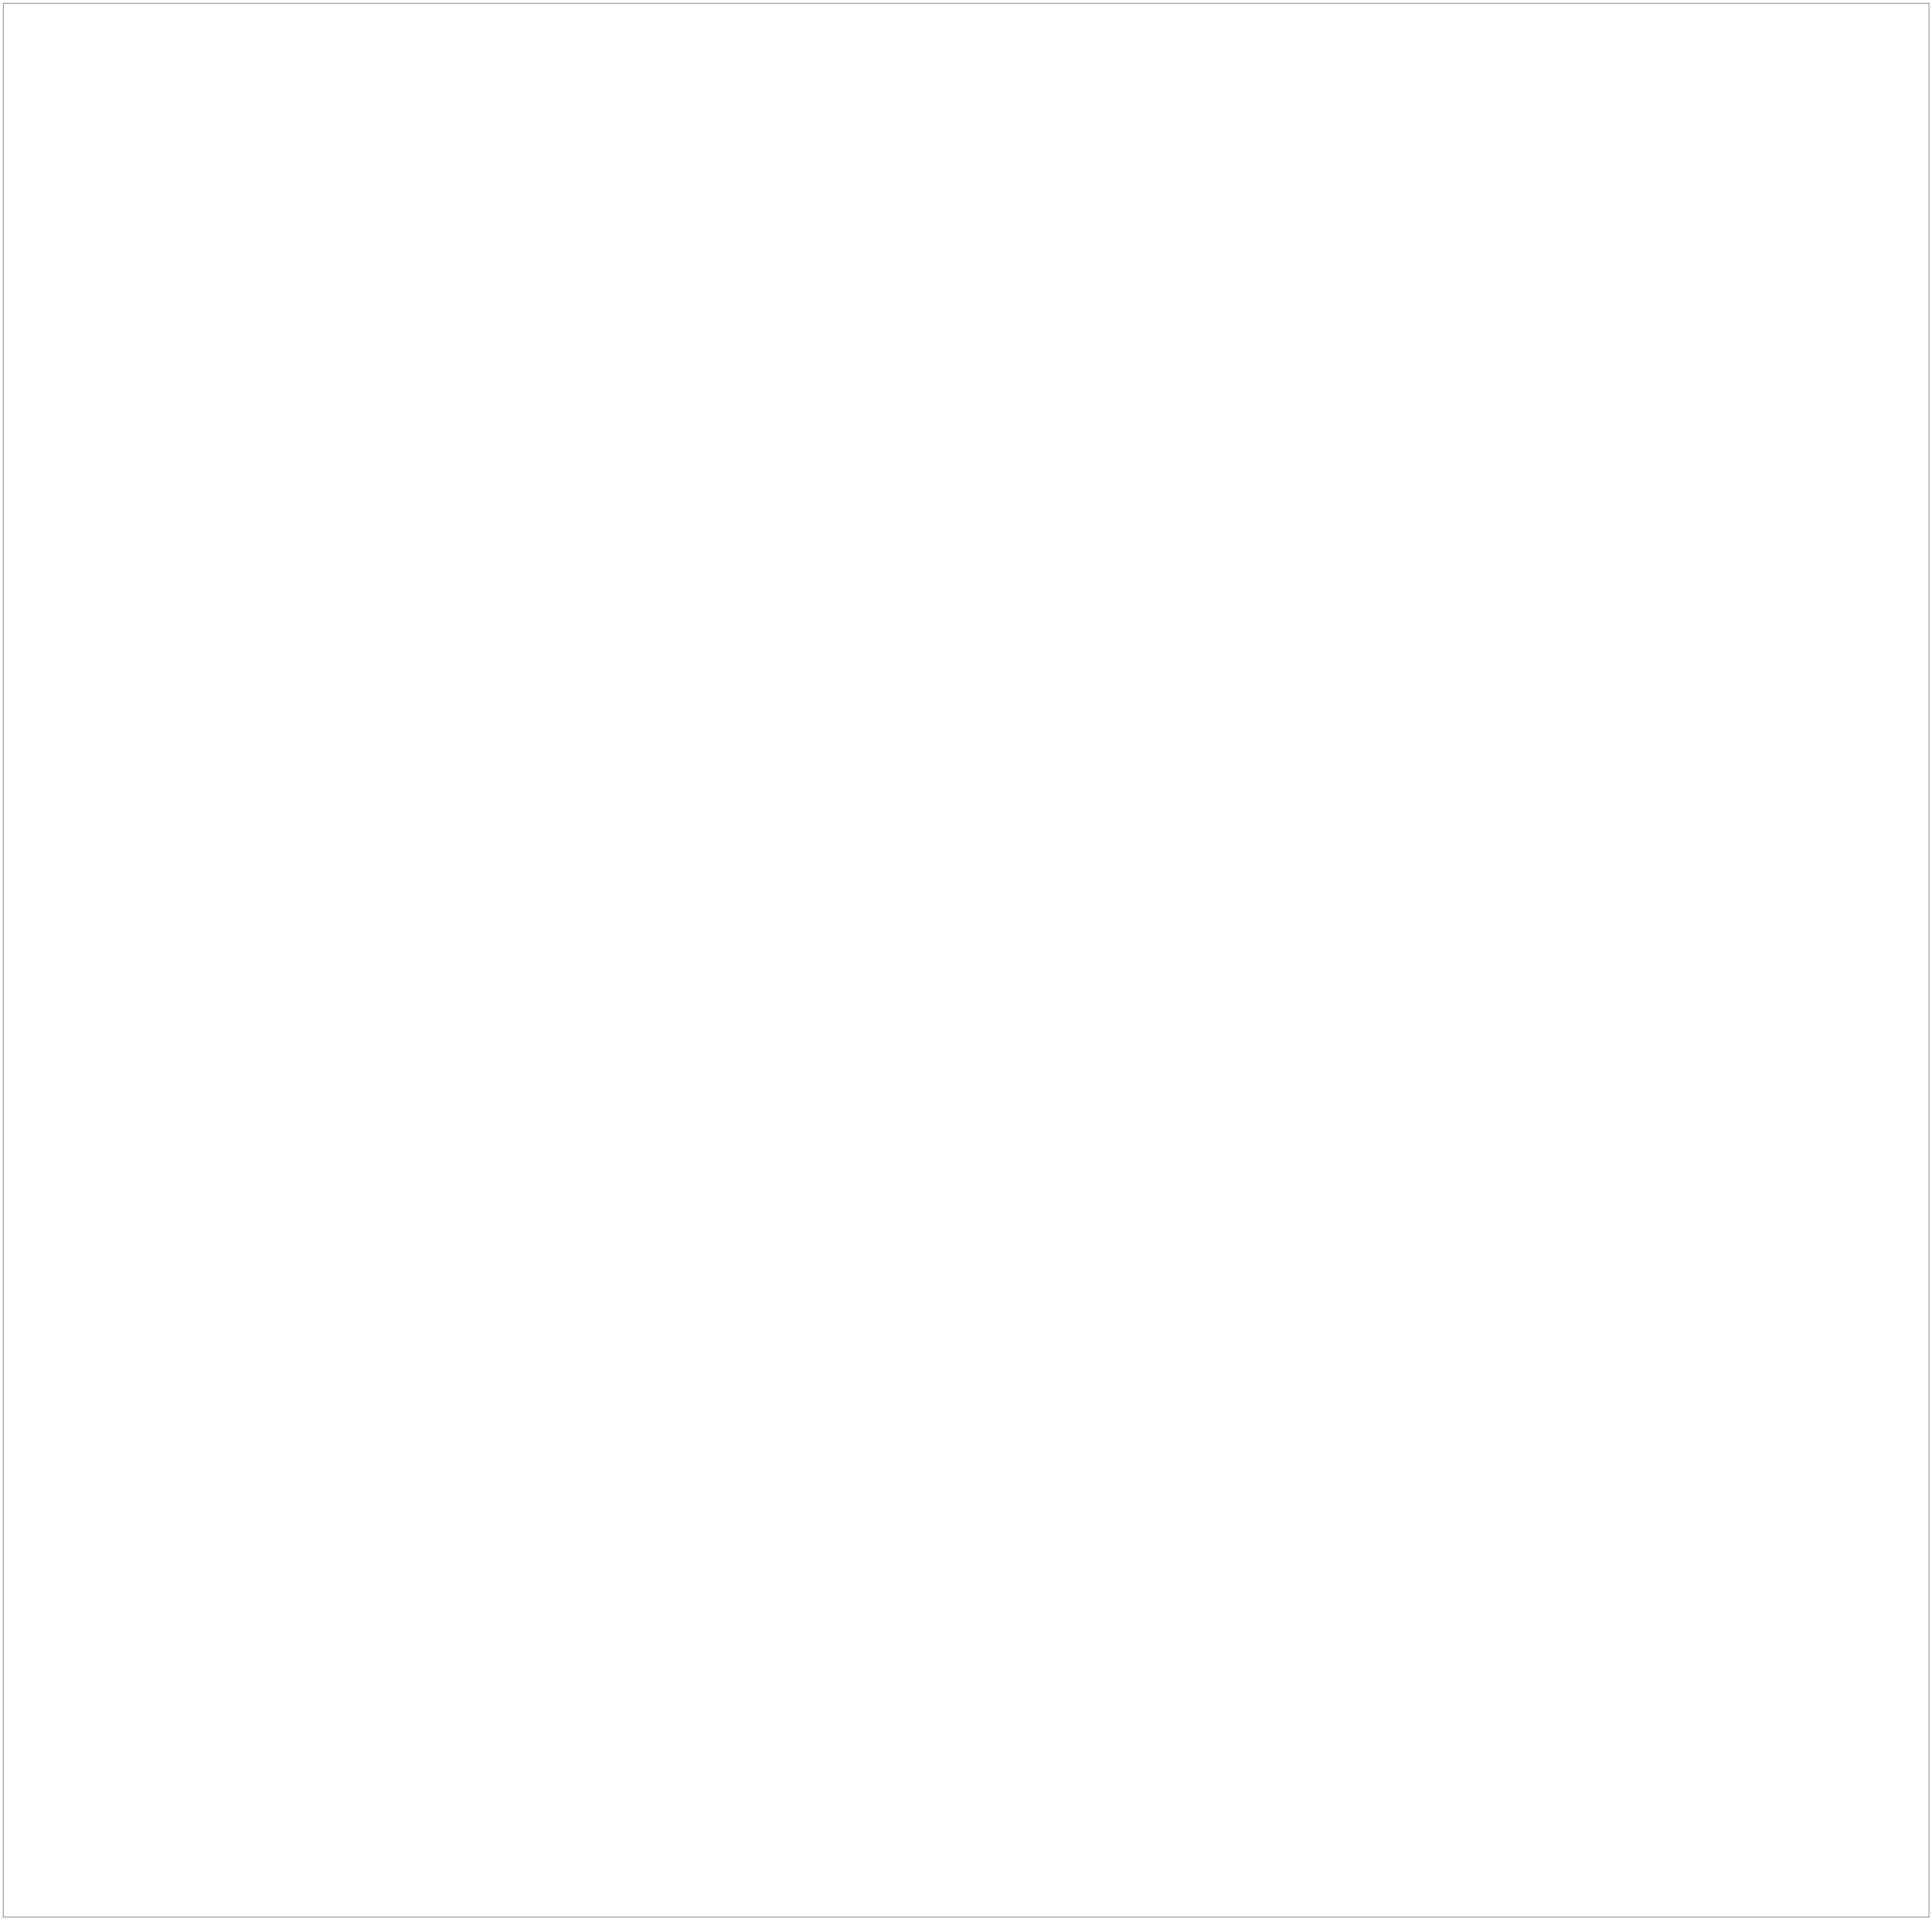

In [12]:
import matplotlib.pyplot as plt
# G =nx.random_graphs.barabasi_albert_graph(100,1)
# nx.draw(G)

plt.figure(figsize=(80,80))

graph_pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, graph_pos, node_size=10, node_color='blue', alpha=0.3)
nx.draw_networkx_edges(G, graph_pos)
nx.draw_networkx_labels(G, graph_pos, font_size=8, font_family='sans-serif')

# plt.show()
# plt.savefig("Tactic_Technique.pdf")
# plt.savefig("Tactic_Technique_Reference.pdf")
plt.savefig("Tactic_Technique_Reference_Example.pdf")

In [13]:
# Save graph
# nx.write_gml(G, "mitre_attack.gml")
# nx.write_gml(G, "Tactic_Technique.gml")
# nx.write_gml(G, "Tactic_Technique_Reference.gml")
nx.write_gml(G, "Tactic_Technique_Reference_1.gml")

In [14]:
# Read graph
G = nx.read_gml('Tactic_Technique_Reference_1.gml')

In [15]:
!pip install --upgrade --no-cache-dir gdown

In [16]:
import gdown

url = 'https://drive.google.com/file/d/1LDAZlJ1w6HYcYSPxnV0RDeJzs0z7zB6Z/view?usp=sharing'
output_path = 'MITRE ATT&CK(1).html'
gdown.download(url, output_path, quiet=False,fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1LDAZlJ1w6HYcYSPxnV0RDeJzs0z7zB6Z
To: /content/MITRE ATT&CK(1).html
100%|██████████| 1.44M/1.44M [00:00<00:00, 733MB/s]


'MITRE ATT&CK(1).html'

In [17]:
soup = BeautifulSoup(open(r"MITRE ATT&CK(1).html"))

table = soup.find_all("table")[1]

In [18]:
table

<table class="matrix side">
<thead>
<tr>
<td class="tactic name"><a data-original-title="TA0043" data-placement="top" data-toggle="tooltip" href="https://attack.mitre.org/tactics/TA0043" title="">Reconnaissance</a></td>
<td class="tactic name"><a data-original-title="TA0042" data-placement="top" data-toggle="tooltip" href="https://attack.mitre.org/tactics/TA0042" title="">Resource Development</a></td>
<td class="tactic name"><a data-original-title="TA0001" data-placement="top" data-toggle="tooltip" href="https://attack.mitre.org/tactics/TA0001" title="">Initial Access</a></td>
<td class="tactic name"><a data-original-title="TA0002" data-placement="top" data-toggle="tooltip" href="https://attack.mitre.org/tactics/TA0002" title="">Execution</a></td>
<td class="tactic name"><a data-original-title="TA0003" data-placement="top" data-toggle="tooltip" href="https://attack.mitre.org/tactics/TA0003" title="">Persistence</a></td>
<td class="tactic name"><a data-original-title="TA0004" data-place

In [19]:
# Add tactics to Graph

tactic_list = []

head = table.find("thead")
for head_content in head.find_all("a"):
    tactic_name = head_content.text
    tactic_url = head_content['href']
    tactic_list.append(tactic_url)
    print(tactic_url)

    G.add_node(tactic_url, name=tactic_name, types='tactic')

https://attack.mitre.org/tactics/TA0043
https://attack.mitre.org/tactics/TA0042
https://attack.mitre.org/tactics/TA0001
https://attack.mitre.org/tactics/TA0002
https://attack.mitre.org/tactics/TA0003
https://attack.mitre.org/tactics/TA0004
https://attack.mitre.org/tactics/TA0005
https://attack.mitre.org/tactics/TA0006
https://attack.mitre.org/tactics/TA0007
https://attack.mitre.org/tactics/TA0008
https://attack.mitre.org/tactics/TA0009
https://attack.mitre.org/tactics/TA0011
https://attack.mitre.org/tactics/TA0010
https://attack.mitre.org/tactics/TA0040


In [20]:
# Add techniques to Graph

body = table.find("tbody")
tactic_count = 0

for body_content in body.find_all('table', {'class': 'techniques-table'}):
    tactic = tactic_list[tactic_count]
    tactic_count += 1
    print(tactic)

    print(len(body_content.find_all('table', {'class': 'supertechnique'})))

    for technique_row in body_content.find_all('tr', {'class': 'technique-row'}):
#         technique_list = []
        super_technique = technique_row.find_all('table', {'class': 'supertechnique'})
        is_super_technique = len(super_technique) # this value is zero when there is no sub-technique.
#         print(is_super_technique)
        if is_super_technique:
            super_technique_name = super_technique[0].find('a').text
            super_technique_url = super_technique[0].find('a')['href']
            print(super_technique_url)
            G.add_node(super_technique_url, name=super_technique_name, types='super_technique')
            G.add_edge(super_technique_url, tactic, type='belong to')

            for sub_technique in technique_row.find_all('div', {'class': 'subtechnique'}):
                sub_technique_name = sub_technique.find('a').text
                sub_technique_url = sub_technique.find('a')['href']
                print(sub_technique_url)
                G.add_node(sub_technique_url, name=sub_technique_name, types='sub_technique')
                G.add_edge(sub_technique_url, super_technique_url, types='belong to')
        else:
            technique_name = technique_row.find('a').text
            technique_url = technique_row.find('a')['href']
            print(technique_url)
            G.add_node(technique_url, name=technique_name, types='technique')
            G.add_edge(technique_url, tactic, types='belong to')

https://attack.mitre.org/tactics/TA0043
9
https://attack.mitre.org/techniques/T1595
https://attack.mitre.org/techniques/T1595/001
https://attack.mitre.org/techniques/T1595/002
https://attack.mitre.org/techniques/T1595/003
https://attack.mitre.org/techniques/T1592
https://attack.mitre.org/techniques/T1592/001
https://attack.mitre.org/techniques/T1592/002
https://attack.mitre.org/techniques/T1592/003
https://attack.mitre.org/techniques/T1592/004
https://attack.mitre.org/techniques/T1589
https://attack.mitre.org/techniques/T1589/001
https://attack.mitre.org/techniques/T1589/002
https://attack.mitre.org/techniques/T1589/003
https://attack.mitre.org/techniques/T1590
https://attack.mitre.org/techniques/T1590/001
https://attack.mitre.org/techniques/T1590/002
https://attack.mitre.org/techniques/T1590/003
https://attack.mitre.org/techniques/T1590/004
https://attack.mitre.org/techniques/T1590/005
https://attack.mitre.org/techniques/T1590/006
https://attack.mitre.org/techniques/T1591
https://atta

In [21]:
# Add URLs to Graph

import requests

techniques_list = list(G.nodes())

for techniques_url in techniques_list:
#     print(G.nodes[techniques]['url'])
    if techniques_url.find('technique') != -1:
        print(techniques_url)
        technique_html = requests.get(techniques_url).text

        soup = BeautifulSoup(technique_html)
        for reference in soup.find_all('span', {'class': 'scite-citation'}):
            try:
                reference_name = reference.find('a').text
                reference_url = reference.find('a')['href']
            except:
                continue
            print(reference_url)
            G.add_node(reference_url, label=reference_name, types='reference')
            G.add_edge(reference_url, techniques_url, types='used')

Streaming output truncated to the last 5000 lines.
https://cyberwtf.files.wordpress.com/2017/07/panda-whitepaper.pdf
https://www.zscaler.com/blogs/security-research/apt-31-leverages-covid-19-vaccine-theme-and-abuses-legitimate-online
https://web.archive.org/web/20230115144216/http://www.novetta.com/wp-content/uploads/2014/11/Executive_Summary-Final_1.pdf
https://scadahacker.com/library/Documents/Cyber_Events/McAfee%20-%20Night%20Dragon%20-%20Global%20Energy%20Cyberattacks.pdf
https://blogs.cisco.com/security/talos/opening-zxshell
https://blog.talosintelligence.com/2022/05/bitter-apt-adds-bangladesh-to-their.html
https://attack.mitre.org/techniques/T1614
https://assets.documentcloud.org/documents/20413525/fbi-flash-indicators-of-compromise-ragnar-locker-ransomware-11192020-bc.pdf
https://news.sophos.com/en-us/2016/05/03/location-based-ransomware-threat-research/
https://www.bleepingcomputer.com/news/security/new-rat-malware-gets-commands-via-discord-has-ransomware-feature/
https://docs.

In [24]:
"""from selenium import webdriver

technique_count = 0
technique_with_example_count = 0

for techniques in list(G.nodes()):
    if G.nodes[techniques]['types'].find('technique') != -1:
        technique_url = 'https://attack.mitre.org' + techniques
        technique_html = webdriver.Chrome()
        technique_html.get(technique_url)
        technique_count += 1
        soup = BeautifulSoup(technique_html.page_source, 'html.parser')
        """
import requests

technique_count = 0
technique_with_example_count = 0

for techniques in list(G.nodes()):
    if G.nodes[techniques]['types'].find('technique') != -1:
        technique_url = techniques
#         print(technique_url)
        technique_html = requests.get(technique_url).text
        technique_count += 1

#         pe_file = open("./data/"+ techniques.replace('/','_'), "w")

        soup = BeautifulSoup(technique_html)

        is_procedure_example_exists = soup.find_all('h2', {'id': 'mitigations'})
        if is_procedure_example_exists:
            technique_with_example_count += 1
            procedure_example_table = soup.find('table', {'class': 'table table-bordered table-alternate mt-2'})
            if procedure_example_table != None:
             for procedure_example in procedure_example_table:
               try:
                 example = procedure_example.find_all('th')
                 if example[1].text == "Mitigation":
                    for produce_examples in procedure_example_table.find_all('tr')[1:]:
                      produce_name = produce_examples.find_all('a')[0].text
                      print(produce_name)
                      mitigations_description = produce_examples.find_all('td')[1].text
                      print(mitigations_description)
                      G.add_node(produce_name,name=mitigations_description, types='mitigations')
                      G.add_edge(techniques, produce_name, types='mitigating to')
               except:
                  continue
#         pe_file.close()


 M1056 

 Pre-compromise 

 M1056 

 Pre-compromise 

 M1056 

 Pre-compromise 

 M1056 

 Pre-compromise 

 M1056 

 Pre-compromise 

 M1056 

 Pre-compromise 

 M1056 

 Pre-compromise 

 M1056 

 Pre-compromise 

 M1056 

 Pre-compromise 

 M1017 

 User Training 

 M1056 

 Pre-compromise 

 M1056 

 Pre-compromise 

 M1056 

 Pre-compromise 

 M1056 

 Pre-compromise 

 M1056 

 Pre-compromise 

 M1056 

 Pre-compromise 

 M1056 

 Pre-compromise 

 M1056 

 Pre-compromise 

 M1056 

 Pre-compromise 

 M1056 

 Pre-compromise 

 M1056 

 Pre-compromise 

 M1056 

 Pre-compromise 

 M1056 

 Pre-compromise 

 M1056 

 Pre-compromise 

 M1056 

 Pre-compromise 

 M1056 

 Pre-compromise 

 M1056 

 Pre-compromise 

 M1056 

 Pre-compromise 

 M1056 

 Pre-compromise 

 M1051 

 Update Software 

 M1016 

 Vulnerability Scanning 

 M1046 

 Boot Integrity 

 M1038 

 Execution Prevention 

 M1026 

 Privileged Account Management 

 M1018 

 User Account Management 

 M1013 

 Applica

In [25]:
print(technique_count)
print(technique_with_example_count)

594
594


In [26]:
# find attack produces adopting T1566 and T1059 at the same time.

r1 = [n for n in G.neighbors('https://attack.mitre.org/techniques/T1555/001')]
r2 = [n for n in G.neighbors('https://attack.mitre.org/techniques/T1555/001')]
r1_r2 = set(r1) & set(r2)

print(r1_r2)

{'https://support.passware.com/hc/en-us/articles/4573379868567-A-Deep-Dive-into-Apple-Keychain-Decryption', 'https://objective-see.com/blog/blog_0x68.html', 'http://www.slideshare.net/StephanBorosh/external-to-da-the-os-x-way', 'https://developer.apple.com/documentation/security/keychain_services/keychain_items', 'https://github.com/AlessandroZ/LaZagne', 'https://www.netmeister.org/blog/keychain-passwords.html', 'https://developer.apple.com/documentation/security/keychain_services', 'https://securelist.com/calisto-trojan-for-macos/86543/', 'https://www.symantec.com/security-center/writeup/2018-073014-2512-99?om_rssid=sr-latestthreats30days', 'https://objective-see.com/blog/blog_0x25.html', 'https://www.welivesecurity.com/2022/01/25/watering-hole-deploys-new-macos-malware-dazzlespy-asia/', 'https://attack.mitre.org/techniques/T1555', 'https://www.glitch-cat.com/blog/green-lambert-and-attack', 'https://github.com/EmpireProject/Empire/blob/08cbd274bef78243d7a8ed6443b8364acd1fc48b/lib/modu

In [27]:
# t = [n for n in G.neighbors('https://securelist.com/cloud-atlas-redoctober-apt-is-back-in-style/68083/')]
for n in G.neighbors('https://www2.fireeye.com/rs/fireye/images/APT17_Report.pdf'):
    print(n) # + ": " + G.nodes[n]['label'])

https://attack.mitre.org/techniques/T1583/006
https://attack.mitre.org/techniques/T1585
https://attack.mitre.org/techniques/T1059/003
https://attack.mitre.org/techniques/T1070/004
https://attack.mitre.org/techniques/T1083
https://attack.mitre.org/techniques/T1057
https://attack.mitre.org/techniques/T1104
https://attack.mitre.org/techniques/T1102/001
https://attack.mitre.org/techniques/T1102/002


In [28]:
from collections import defaultdict

# Initialize a dictionary to store the counts
technique_counts = defaultdict(int)
# Iterate over all edges in the graph
for edge in G.edges(data=True):
    # Check if the edge type is 'used' and the technique is in the techniques_list
    if edge[2] == {'types': 'used'} and edge[0] in techniques_list:

        # Increment the count for the technique_url
        technique_counts[edge[0]] += 1

# # Print the counts
for technique_url, count in technique_counts.items():
    print(f"{technique_url}: {count}")

https://attack.mitre.org/techniques/T1595: 2
https://attack.mitre.org/techniques/T1595/001: 2
https://attack.mitre.org/techniques/T1595/002: 12
https://attack.mitre.org/techniques/T1595/003: 3
https://attack.mitre.org/techniques/T1592: 2
https://attack.mitre.org/techniques/T1592/001: 2
https://attack.mitre.org/techniques/T1592/002: 5
https://attack.mitre.org/techniques/T1592/003: 1
https://attack.mitre.org/techniques/T1592/004: 3
https://attack.mitre.org/techniques/T1589: 15
https://attack.mitre.org/techniques/T1589/001: 16
https://attack.mitre.org/techniques/T1589/002: 21
https://attack.mitre.org/techniques/T1589/003: 4
https://attack.mitre.org/techniques/T1590: 4
https://attack.mitre.org/techniques/T1590/001: 8
https://attack.mitre.org/techniques/T1590/002: 3
https://attack.mitre.org/techniques/T1590/003: 1
https://attack.mitre.org/techniques/T1590/004: 1
https://attack.mitre.org/techniques/T1590/005: 6
https://attack.mitre.org/techniques/T1590/006: 1
https://attack.mitre.org/techniq

In [29]:
CLASSES = [
   'T1003.001', 'T1005', 'T1012', 'T1016', 'T1021.001', 'T1027',
   'T1033', 'T1036.005', 'T1041', 'T1047', 'T1053.005', 'T1055',
   'T1056.001', 'T1057', 'T1059.003', 'T1068', 'T1070.004',
   'T1071.001', 'T1072', 'T1074.001', 'T1078', 'T1082', 'T1083',
   'T1090', 'T1095', 'T1105', 'T1106', 'T1110', 'T1112', 'T1113',
   'T1140', 'T1190', 'T1204.002', 'T1210', 'T1218.011', 'T1219',
   'T1484.001', 'T1518.001', 'T1543.003', 'T1547.001', 'T1548.002',
   'T1552.001', 'T1557.001', 'T1562.001', 'T1564.001', 'T1566.001',
   'T1569.002', 'T1570', 'T1573.001', 'T1574.002'
]

CLASSES = [f"https://attack.mitre.org/techniques/{cls.replace('.', '/')}" for cls in CLASSES]

# Print the updated list
for cls in CLASSES:
    print(cls)


https://attack.mitre.org/techniques/T1003/001
https://attack.mitre.org/techniques/T1005
https://attack.mitre.org/techniques/T1012
https://attack.mitre.org/techniques/T1016
https://attack.mitre.org/techniques/T1021/001
https://attack.mitre.org/techniques/T1027
https://attack.mitre.org/techniques/T1033
https://attack.mitre.org/techniques/T1036/005
https://attack.mitre.org/techniques/T1041
https://attack.mitre.org/techniques/T1047
https://attack.mitre.org/techniques/T1053/005
https://attack.mitre.org/techniques/T1055
https://attack.mitre.org/techniques/T1056/001
https://attack.mitre.org/techniques/T1057
https://attack.mitre.org/techniques/T1059/003
https://attack.mitre.org/techniques/T1068
https://attack.mitre.org/techniques/T1070/004
https://attack.mitre.org/techniques/T1071/001
https://attack.mitre.org/techniques/T1072
https://attack.mitre.org/techniques/T1074/001
https://attack.mitre.org/techniques/T1078
https://attack.mitre.org/techniques/T1082
https://attack.mitre.org/techniques/T108

In [58]:
print(len(CLASSES))

50


In [30]:
technique_reference_counts = []

# Iterate over the CLASSES list

for technique in CLASSES:
    # Get the count of references for the technique
    count = technique_counts.get(technique, 0)
    # Append the tuple (technique, count) to the list
    technique_reference_counts.append((technique, count))

# Print the list of tuples
for technique, count in technique_reference_counts:
    print(f"{technique}: {count}")

https://attack.mitre.org/techniques/T1003/001: 95
https://attack.mitre.org/techniques/T1005: 201
https://attack.mitre.org/techniques/T1012: 109
https://attack.mitre.org/techniques/T1016: 257
https://attack.mitre.org/techniques/T1021/001: 61
https://attack.mitre.org/techniques/T1027: 371
https://attack.mitre.org/techniques/T1033: 217
https://attack.mitre.org/techniques/T1036/005: 178
https://attack.mitre.org/techniques/T1041: 150
https://attack.mitre.org/techniques/T1047: 139
https://attack.mitre.org/techniques/T1053/005: 189
https://attack.mitre.org/techniques/T1055: 76
https://attack.mitre.org/techniques/T1056/001: 184
https://attack.mitre.org/techniques/T1057: 284
https://attack.mitre.org/techniques/T1059/003: 359
https://attack.mitre.org/techniques/T1068: 44
https://attack.mitre.org/techniques/T1070/004: 263
https://attack.mitre.org/techniques/T1071/001: 384
https://attack.mitre.org/techniques/T1072: 6
https://attack.mitre.org/techniques/T1074/001: 99
https://attack.mitre.org/techni

In [76]:
import pandas as pd

df2 = pd.DataFrame(technique_reference_counts, columns=['Technique', 'Count_MITRE_database'])
# Set 'Technique' as the index
df2.set_index('Technique', inplace=True)

print(df2)

                                               Count_MITRE_database
Technique                                                          
https://attack.mitre.org/techniques/T1003/001                    95
https://attack.mitre.org/techniques/T1005                       201
https://attack.mitre.org/techniques/T1012                       109
https://attack.mitre.org/techniques/T1016                       257
https://attack.mitre.org/techniques/T1021/001                    61
https://attack.mitre.org/techniques/T1027                       371
https://attack.mitre.org/techniques/T1033                       217
https://attack.mitre.org/techniques/T1036/005                   178
https://attack.mitre.org/techniques/T1041                       150
https://attack.mitre.org/techniques/T1047                       139
https://attack.mitre.org/techniques/T1053/005                   189
https://attack.mitre.org/techniques/T1055                        76
https://attack.mitre.org/techniques/T1056/001   

In [49]:
url = 'https://drive.google.com/file/d/1IqiuvUA-Ia7VsIwO4FK1ed-YBSs_mmd-/view?usp=drive_link'
output_path = 'single_label.json'
gdown.download(url, output_path, quiet=False,fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1IqiuvUA-Ia7VsIwO4FK1ed-YBSs_mmd-
To: /content/single_label.json
100%|██████████| 1.03M/1.03M [00:00<00:00, 88.3MB/s]


'single_label.json'

In [50]:
data = pd.read_json('single_label.json')

In [51]:


unique_elements = data['label'].value_counts()
unique_elements_list = unique_elements.reset_index().values.tolist()

In [52]:
unique_elements_amount = unique_elements.reset_index().values
print(unique_elements_amount)

[['T1027' 685]
 ['T1140' 455]
 ['T1059.003' 345]
 ['T1055' 283]
 ['T1105' 262]
 ['T1106' 202]
 ['T1078' 170]
 ['T1071.001' 146]
 ['T1090' 139]
 ['T1082' 137]
 ['T1003.001' 108]
 ['T1053.005' 106]
 ['T1112' 104]
 ['T1083' 98]
 ['T1562.001' 95]
 ['T1021.001' 94]
 ['T1204.002' 87]
 ['T1566.001' 86]
 ['T1070.004' 86]
 ['T1057' 82]
 ['T1041' 82]
 ['T1574.002' 81]
 ['T1047' 75]
 ['T1036.005' 68]
 ['T1056.001' 65]
 ['T1005' 64]
 ['T1110' 64]
 ['T1547.001' 63]
 ['T1570' 58]
 ['T1016' 55]
 ['T1573.001' 53]
 ['T1218.011' 53]
 ['T1219' 52]
 ['T1190' 51]
 ['T1543.003' 50]
 ['T1095' 50]
 ['T1033' 49]
 ['T1113' 49]
 ['T1518.001' 36]
 ['T1548.002' 27]
 ['T1012' 26]
 ['T1074.001' 25]
 ['T1484.001' 23]
 ['T1569.002' 23]
 ['T1552.001' 20]
 ['T1564.001' 17]
 ['T1210' 16]
 ['T1068' 10]
 ['T1072' 10]
 ['T1557.001' 4]]


In [62]:

# Convert unique_elements_amount to a DataFrame
df3 = pd.DataFrame(unique_elements_amount, columns=['Technique', 'Count_CTI_dataset'])

# Format the 'Technique' column to match the format in CLASSES
df3['Technique'] = df3['Technique'].apply(lambda x: f"https://attack.mitre.org/techniques/{x.replace('.', '/')}")

# Set 'Technique' as the index
df3.set_index('Technique', inplace=True)

# Print the DataFrame
print(df3)
print(len(df3.Count_CTI_dataset))


                                              Count_CTI_dataset
Technique                                                      
https://attack.mitre.org/techniques/T1027                   685
https://attack.mitre.org/techniques/T1140                   455
https://attack.mitre.org/techniques/T1059/003               345
https://attack.mitre.org/techniques/T1055                   283
https://attack.mitre.org/techniques/T1105                   262
https://attack.mitre.org/techniques/T1106                   202
https://attack.mitre.org/techniques/T1078                   170
https://attack.mitre.org/techniques/T1071/001               146
https://attack.mitre.org/techniques/T1090                   139
https://attack.mitre.org/techniques/T1082                   137
https://attack.mitre.org/techniques/T1003/001               108
https://attack.mitre.org/techniques/T1053/005               106
https://attack.mitre.org/techniques/T1112                   104
https://attack.mitre.org/techniques/T108

In [66]:
print(df3.Count_CTI_dataset)


Technique
https://attack.mitre.org/techniques/T1027        685
https://attack.mitre.org/techniques/T1140        455
https://attack.mitre.org/techniques/T1059/003    345
https://attack.mitre.org/techniques/T1055        283
https://attack.mitre.org/techniques/T1105        262
https://attack.mitre.org/techniques/T1106        202
https://attack.mitre.org/techniques/T1078        170
https://attack.mitre.org/techniques/T1071/001    146
https://attack.mitre.org/techniques/T1090        139
https://attack.mitre.org/techniques/T1082        137
https://attack.mitre.org/techniques/T1003/001    108
https://attack.mitre.org/techniques/T1053/005    106
https://attack.mitre.org/techniques/T1112        104
https://attack.mitre.org/techniques/T1083         98
https://attack.mitre.org/techniques/T1562/001     95
https://attack.mitre.org/techniques/T1021/001     94
https://attack.mitre.org/techniques/T1204/002     87
https://attack.mitre.org/techniques/T1566/001     86
https://attack.mitre.org/techniques/

In [64]:
print(len(df3.Count_CTI_dataset))
print(len(df2.Count_MITRE_database))

50
50


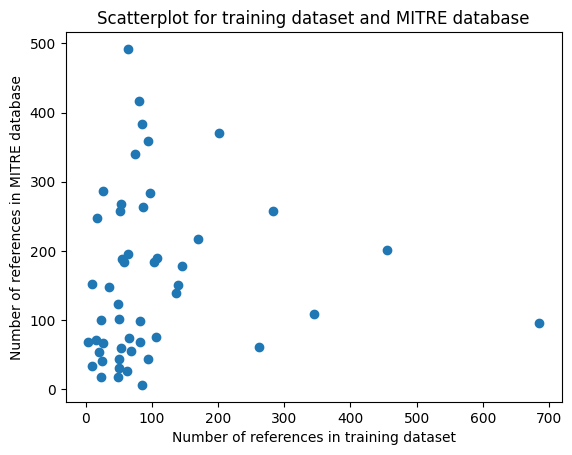

In [63]:
import matplotlib.pyplot as plt

plt.scatter(df3.Count_CTI_dataset, df2.Count_MITRE_database)
plt.xlabel('Number of references in training dataset')
plt.ylabel('Number of references in MITRE database')
plt.title('Scatterplot for training dataset and MITRE database')
plt.show()

In [65]:
from scipy.stats import pearsonr
r = round(pearsonr(df3.Count_CTI_dataset, df2.Count_MITRE_database)[0], 4)

print("The Pearson's r correlation coefficient is: " + str(r))

The Pearson's r correlation coefficient is: 0.0693


In [74]:
url = 'https://drive.google.com/file/d/1BCkEdKgmH49kjihmrxlXVUQvB0GsiQJW/view?usp=drive_link'
output_path = 'TRAM_fine_tuned_SciBERT.json'
gdown.download(url, output_path, quiet=False,fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1BCkEdKgmH49kjihmrxlXVUQvB0GsiQJW
To: /content/TRAM_fine_tuned_SciBERT.json
100%|██████████| 1.38M/1.38M [00:00<00:00, 121MB/s]


'TRAM_fine_tuned_SciBERT.json'

In [77]:
data = pd.read_json('TRAM_fine_tuned_SciBERT.json')

In [78]:
unique_elements = data['label'].value_counts()
unique_elements_list = unique_elements.reset_index().values.tolist()

In [79]:
unique_elements_amount = unique_elements.reset_index().values
print(unique_elements_amount)

[['T1071.001' 433]
 ['T1547.001' 414]
 ['T1105' 411]
 ['T1059.003' 397]
 ['T1070.004' 378]
 ['T1082' 340]
 ['T1036.005' 311]
 ['T1027' 300]
 ['T1083' 294]
 ['T1055' 274]
 ['T1218.011' 265]
 ['T1140' 255]
 ['T1016' 251]
 ['T1566.001' 239]
 ['T1057' 231]
 ['T1204.002' 213]
 ['T1573.001' 206]
 ['T1574.002' 197]
 ['T1041' 196]
 ['T1543.003' 193]
 ['T1548.002' 193]
 ['T1012' 188]
 ['T1033' 184]
 ['T1056.001' 184]
 ['T1003.001' 181]
 ['T1562.001' 180]
 ['T1053.005' 173]
 ['T1564.001' 173]
 ['T1110' 172]
 ['T1021.001' 164]
 ['T1518.001' 153]
 ['T1095' 150]
 ['T1113' 145]
 ['T1090' 130]
 ['T1210' 129]
 ['T1106' 129]
 ['T1552.001' 121]
 ['T1557.001' 117]
 ['T1112' 116]
 ['T1190' 112]
 ['T1005' 111]
 ['T1047' 110]
 ['T1219' 107]
 ['T1484.001' 105]
 ['T1074.001' 102]
 ['T1072' 92]
 ['T1078' 90]
 ['T1570' 80]
 ['T1569.002' 64]
 ['T1068' 58]]


In [80]:
# Convert unique_elements_amount to a DataFrame
df4 = pd.DataFrame(unique_elements_amount, columns=['Technique', 'Count_CTI_dataset'])

# Format the 'Technique' column to match the format in CLASSES
df4['Technique'] = df4['Technique'].apply(lambda x: f"https://attack.mitre.org/techniques/{x.replace('.', '/')}")

# Set 'Technique' as the index
df4.set_index('Technique', inplace=True)

# Print the DataFrame
print(df4)

                                              Count_CTI_dataset
Technique                                                      
https://attack.mitre.org/techniques/T1071/001               433
https://attack.mitre.org/techniques/T1547/001               414
https://attack.mitre.org/techniques/T1105                   411
https://attack.mitre.org/techniques/T1059/003               397
https://attack.mitre.org/techniques/T1070/004               378
https://attack.mitre.org/techniques/T1082                   340
https://attack.mitre.org/techniques/T1036/005               311
https://attack.mitre.org/techniques/T1027                   300
https://attack.mitre.org/techniques/T1083                   294
https://attack.mitre.org/techniques/T1055                   274
https://attack.mitre.org/techniques/T1218/011               265
https://attack.mitre.org/techniques/T1140                   255
https://attack.mitre.org/techniques/T1016                   251
https://attack.mitre.org/techniques/T156

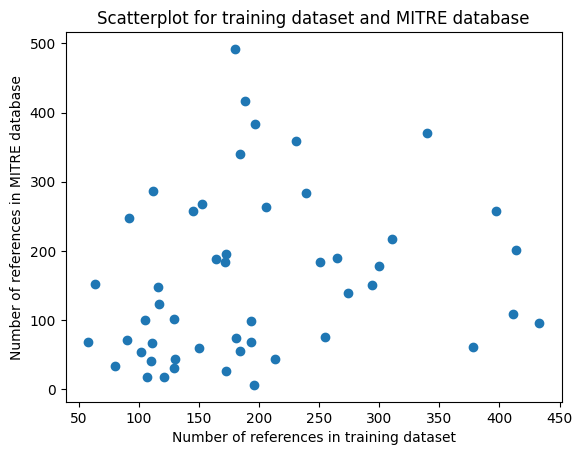

In [81]:
import matplotlib.pyplot as plt

plt.scatter(df4.Count_CTI_dataset, df2.Count_MITRE_database)
plt.xlabel('Number of references in training dataset')
plt.ylabel('Number of references in MITRE database')
plt.title('Scatterplot for training dataset and MITRE database')
plt.show()

In [82]:
r = round(pearsonr(df4.Count_CTI_dataset, df2.Count_MITRE_database)[0], 4)

print("The Pearson's r correlation coefficient is: " + str(r))

The Pearson's r correlation coefficient is: 0.2097
